# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 12</center>

# <center>KMean Clustering</center>

![image-14.png](attachment:image-14.png)

# <font color="blue">Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Train test Split </li>
<li> Train Linear Model</li>
<li> Train Non Linear Model</li>
<li> Train Complex Model </li>
<li> Train Regularized Model</li>
</ol>

## <font color = blue>0. Learning Objectives

Use Kmean algorithm to implement unsupervised clustering for iris dataset.

By the end of the lab, you should be able to :
- Differentiate supervised and unsupervised learning.


- Implement Kmean clustering any given dataset.





## <font color = blue>1. Loading Data

    - Lets load iris dataset for clustering. Note that you don't have to include target for unsupervised learning.
    

In [18]:
#import libraries first
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
import seaborn as sns

In [3]:
#Load datasets
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## <font color = blue> 2. Data Manipulationa and visualization

In [9]:
#visualize your data here
import pandas as pd
idf = pd.DataFrame(iris.data, columns=iris.feature_names)
idf.head()


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [20]:
idf.drop(['petal length (cm)', 'petal width (cm)'], axis=1, inplace=True)
idf

sepal length (cm)  sepal width (cm)
0                  5.1               3.5
1                  4.9               3.0
2                  4.7               3.2
3                  4.6               3.1
4                  5.0               3.6
..                 ...               ...
145                6.7               3.0
146                6.3               2.5
147                6.5               3.0
148                6.2               3.4
149                5.9               3.0

[150 rows x 2 columns]

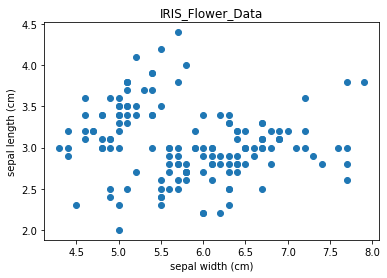

In [25]:
x_name = idf['sepal length (cm)']
y_name = idf['sepal width (cm)']
plt.scatter(x_name,y_name)
plt.title("IRIS_Flower_Data")
plt.xlabel("sepal width (cm)")
plt.ylabel("sepal length (cm)")
plt.show()

## <font color = blue> 3. Train model

In [27]:
#train your model here
from sklearn.cluster import KMeans
x_name = idf[['sepal length (cm)', 'sepal width (cm)']]
k_mean = KMeans(n_clusters=3, random_state=0).fit(x_name)
k_mean

KMeans(n_clusters=3, random_state=0)

## <font color = blue> 4. Explore KMeans attributes

In [35]:
## Cluster centers
k_mean.cluster_centers_

array([[5.77358491, 2.69245283],
       [5.006     , 3.428     ],
       [6.81276596, 3.07446809]])

In [32]:
#Getting inertia value

#check Kmean algorithm's attribute
print (f"The value of the inertia value is {k_mean.inertia_} ") # high value of inertia means the model is not performing well

The value of the inertia value is 37.05070212765957 


In [40]:
 k_mean.n_iter_

14

In [42]:
 k_mean.n_features_in_

2

In [44]:
k_mean.feature_names_in_

array(['sepal length (cm)', 'sepal width (cm)'], dtype=object)

## <font color = blue> 5. Prediction

In [59]:
#create sample data to make prediction. Interpret your output for unsupervised clustering
x_sample = [[5.1,3.5],[4.9,3.0],[4.7,3.2]]

In [60]:
y_pred = k_mean.predict(x_sample)
y_pred

C:\Users\Lab-1\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1, 1, 1])

## <font color = blue> 6. Plotting clusters with thier centroids

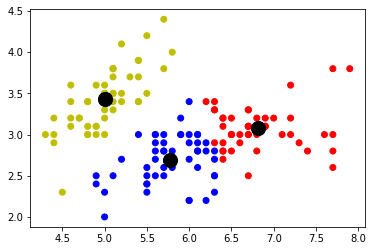

In [61]:
# Plot your datapoints and show the clusters in different colors along with thier cluster centroids.
import seaborn as sns
color = np.array(['b', 'y', 'r'])
cate = k_mean.predict(x_name)
x_name = idf[['sepal length (cm)', 'sepal width (cm)']]
plt.scatter(x_name['sepal length (cm)'], x_name['sepal width (cm)'], c=color[cate])

centers = k_mean.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);



## <font color = blue> 7. Use elbow method to choose K for Kmean

In [62]:
# plot grah to decide K value for given dataset.
dic = []
K = range(1,4)
for k in K:
    k_meanModel = KMeans(n_clusters=k)
    k_meanModel.fit(x_name)
    dic.append(k_meanModel.inertia_)



C:\Users\Lab-1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


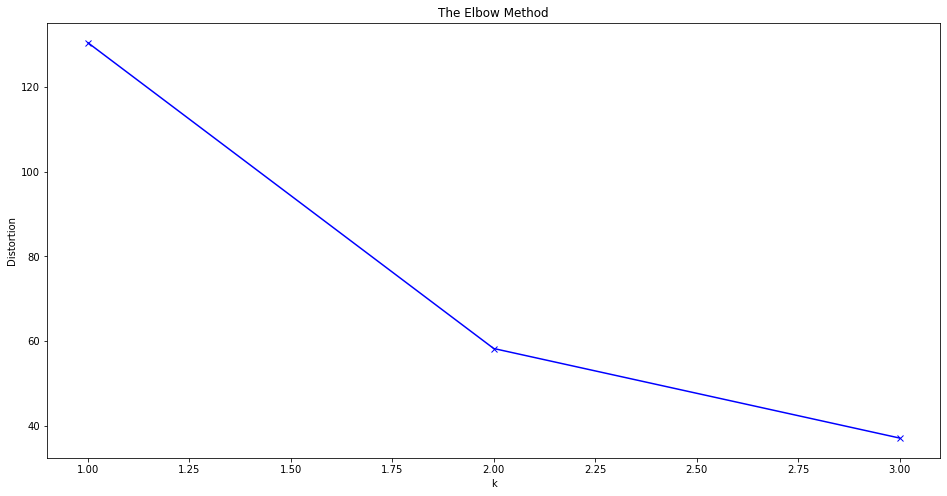

In [63]:
plt.figure(figsize=(16,8))
plt.plot(K, dic, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()